<a href="https://colab.research.google.com/github/vis243/investo/blob/main/investo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Descripton use the simple moving strategy using python to get buy and sell signals

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#load the data
from google.colab import files
files.upload()


Saving HINDALCO_1D.csv to HINDALCO_1D.csv


{'HINDALCO_1D.csv': b'datetime,close,high,low,open,volume,instrument\r\n2014-01-24 00:00:00,114,115.35,113,113.15,5737135,HINDALCO\r\n2014-01-27 00:00:00,111.1,112.7,109.3,112,8724577,HINDALCO\r\n2014-01-28 00:00:00,113.8,115,109.75,110,4513345,HINDALCO\r\n2014-01-29 00:00:00,111.75,114.75,111.15,114.5,4713458,HINDALCO\r\n2014-01-30 00:00:00,108.1,110.7,107.6,110.2,5077231,HINDALCO\r\n2014-01-31 00:00:00,109.55,110,107,109.05,8287236,HINDALCO\r\n2014-02-03 00:00:00,103.45,109.4,103,109,5572627,HINDALCO\r\n2014-02-04 00:00:00,102.45,103.45,99.8,102,13935173,HINDALCO\r\n2014-02-05 00:00:00,104.25,105.15,101,102.4,9106760,HINDALCO\r\n2014-02-06 00:00:00,105.75,106.5,103.1,104.65,10194884,HINDALCO\r\n2014-02-07 00:00:00,106.4,107.7,104.75,106.15,9650511,HINDALCO\r\n2014-02-10 00:00:00,106.8,107.7,105.8,106.45,3124538,HINDALCO\r\n2014-02-11 00:00:00,104.55,107.1,104.25,106.9,3964390,HINDALCO\r\n2014-02-12 00:00:00,103.5,105.6,103.05,105.15,5325176,HINDALCO\r\n2014-02-13 00:00:00,100.2,104.5

In [6]:
df=pd.read_csv('HINDALCO_1D.csv')
#set date as index
df= df.set_index(pd.DatetimeIndex(df['datetime'].values))
#show the data
df

,datetime,close,high,low,open,volume,instrument
2014-01-24,2014-01-24 00:00:00,114.00,115.35,113.00,113.15,5737135,HINDALCO
2014-01-27,2014-01-27 00:00:00,111.10,112.70,109.30,112.00,8724577,HINDALCO
2014-01-28,2014-01-28 00:00:00,113.80,115.00,109.75,110.00,4513345,HINDALCO
2014-01-29,2014-01-29 00:00:00,111.75,114.75,111.15,114.50,4713458,HINDALCO
2014-01-30,2014-01-30 00:00:00,108.10,110.70,107.60,110.20,5077231,HINDALCO
...,...,...,...,...,...,...,...
2018-12-21,2018-12-21 00:00:00,224.00,227.45,221.80,224.25,6933691,HINDALCO
2018-12-24,2018-12-24 00:00:00,217.85,224.00,216.95,224.00,4667022,HINDALCO
2018-12-26,2018-12-26 00:00:00,218.60,219.80,212.90,213.85,6554865,HINDALCO
2018-12-27,2018-12-27 00:00:00,220.60,223.90,219.60,221.40,7947144,HINDALCO


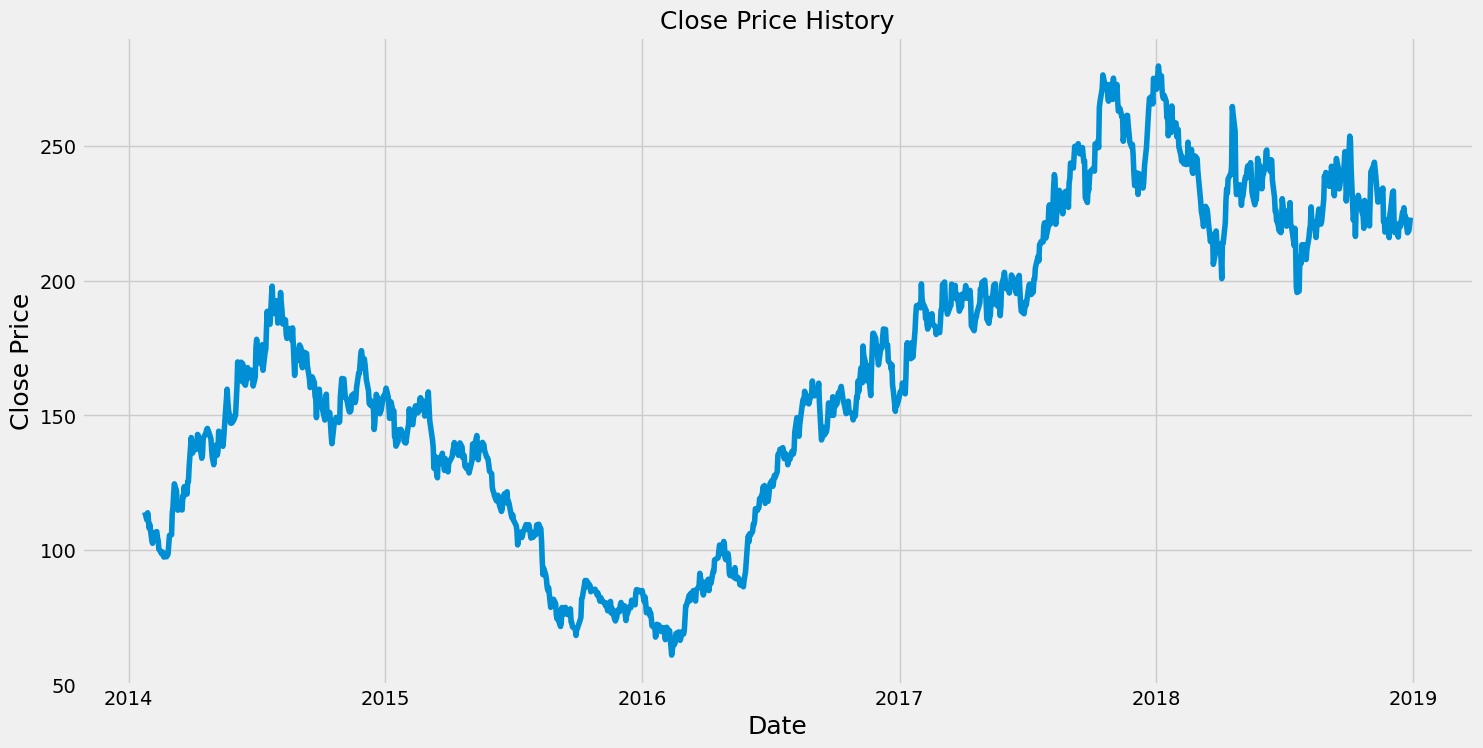

In [8]:
#visually show the close price
plt.figure(figsize=(16,8))
plt.title('Close Price History',fontsize=18)
plt.plot(df['close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [9]:
#create a function to calculate Simple Moving Average(SMA)
def SMA(data,period=30,column='close'):
  return data[column].rolling(window=period).mean()

In [10]:
#create two new columns to store 20day and 50 day sma
df['SMA20']=SMA(df,20)
df['SMA50']=SMA(df,50)

In [11]:
#get the buy and sell signals
df['Signal']=np.where(df['SMA20']>df['SMA50'],1,0)
df['Position']=df['Signal'].diff()
df['Buy']=np.where(df['Position']==1,df['close'],np.NAN)
df['Sell']=np.where(df['Position']==-1,df['close'],np.NAN)

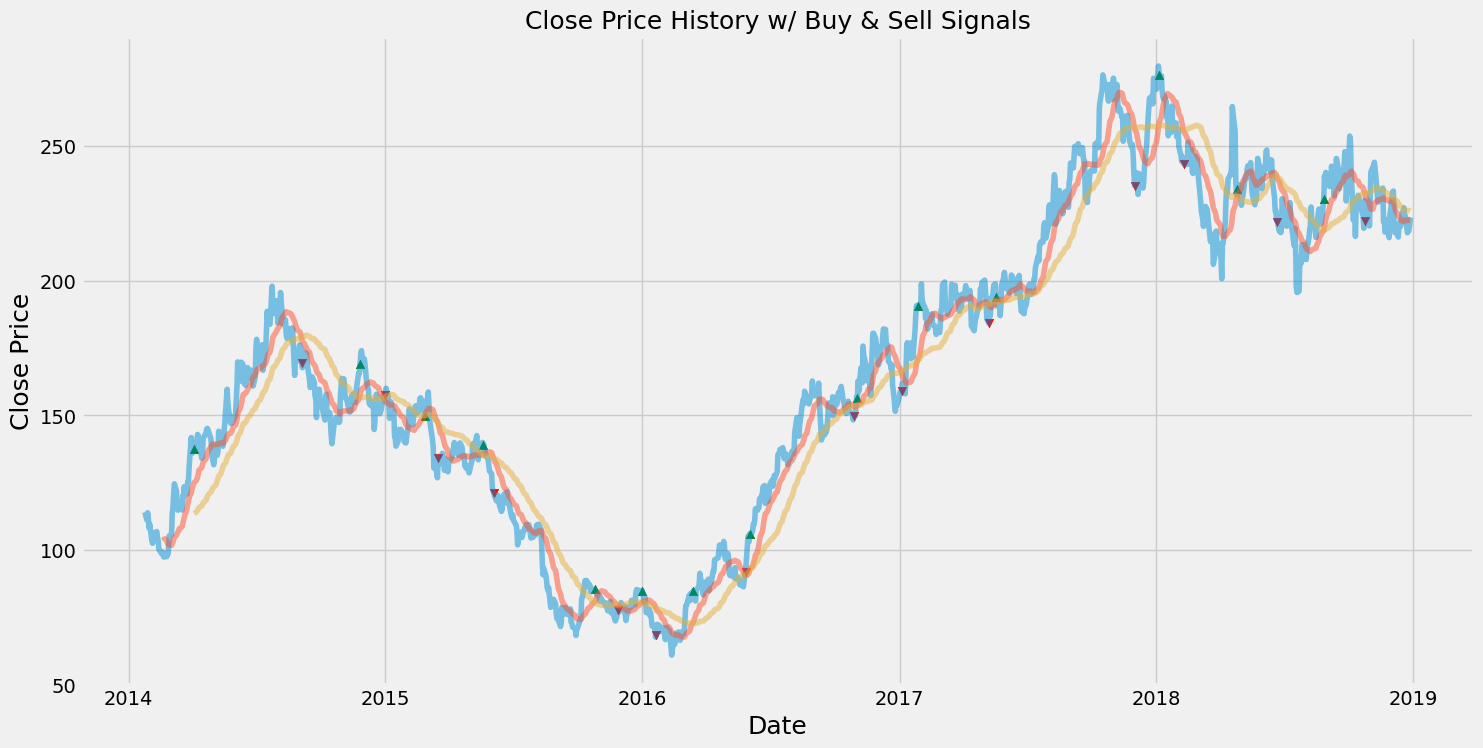

In [12]:
# visually show close price with sma's and buy and sell signals
plt.figure(figsize=(16,8))
plt.title('Close Price History w/ Buy & Sell Signals',fontsize=18)
plt.plot(df['close'],alpha=0.5, label='close')
plt.plot(df['SMA20'],alpha=0.5, label='SMA20')
plt.plot(df['SMA50'],alpha=0.5, label='SMA50')
plt.scatter(df.index,df['Buy'],alpha=1,label='Buy Signal',marker='^',color='green')
plt.scatter(df.index,df['Sell'],alpha=1,label='Sell Signal',marker='v',color='red')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()